<a href="https://colab.research.google.com/github/illambi/Python/blob/main/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop

In [29]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

# Establecer ruta de acceso en drive
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/Fran")
print(os.getcwd())


Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/Fran


In [123]:
# Leer el dataset
df = pd.read_csv('A872819.csv',sep=';', header=1)
df.head()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_5cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_5cm_Media,Temperatura_Suelo_10cm_Media,Temperatura_Inte_5cm,Temperatura_Intemperie_150cm_Minima,...,Duracion_Follaje_Mojado,Velocidad_Viento_200cm_Media,Direccion_Viento_200cm,Velocidad_Viento_1000cm_Media,Direccion_Viento_1000cm,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio
0,2010-11-11 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN
1,2010-11-12 00:00:00.0,14.10626,23.1,5.7,NaN,NaN,NaN,16.25625,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,2.822,-3.651998
2,2010-11-13 00:00:00.0,18.46319,26.7,12.0,NaN,NaN,NaN,18.33056,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-11.703000
3,2010-11-14 00:00:00.0,16.00417,22.5,11.3,NaN,NaN,NaN,19.36319,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-6.805998
4,2010-11-15 00:00:00.0,15.63611,22.1,12.3,NaN,NaN,NaN,19.44653,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-8.216997


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                4351 non-null   object 
 1   Temperatura_Abrigo_150cm             4323 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima      4319 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima      4319 non-null   float64
 4   Temperatura_Intemperie_5cm_Minima    0 non-null      float64
 5   Temperatura_Intemperie_50cm_Minima   0 non-null      float64
 6   Temperatura_Suelo_5cm_Media          0 non-null      float64
 7   Temperatura_Suelo_10cm_Media         4293 non-null   float64
 8   Temperatura_Inte_5cm                 0 non-null      float64
 9   Temperatura_Intemperie_150cm_Minima  0 non-null      float64
 10  Humedad_Suelo                        0 non-null      float64
 11  Precipitacion_Pluviometrica   

In [127]:
print(df.shape)


(4351, 30)


# Data Wrangling

In [125]:
# Verificacion de nulos total
sum(df.isnull().sum())

60198

In [126]:
# Verificacion de nulos por columna
df.isnull().sum()

Fecha                                     0
Temperatura_Abrigo_150cm                 28
Temperatura_Abrigo_150cm_Maxima          32
Temperatura_Abrigo_150cm_Minima          32
Temperatura_Intemperie_5cm_Minima      4351
Temperatura_Intemperie_50cm_Minima     4351
Temperatura_Suelo_5cm_Media            4351
Temperatura_Suelo_10cm_Media             58
Temperatura_Inte_5cm                   4351
Temperatura_Intemperie_150cm_Minima    4351
Humedad_Suelo                          4351
Precipitacion_Pluviometrica             248
Precipitacion_Cronologica               261
Precipitacion_Maxima_30minutos          212
Heliofania_Efectiva                    4351
Heliofania_Relativa                    4351
Tesion_Vapor_Media                      359
Humedad_Media                            30
Humedad_Media_8_14_20                   369
Rocio_Medio                             617
Duracion_Follaje_Mojado                4351
Velocidad_Viento_200cm_Media           3199
Direccion_Viento_200cm          

In [128]:
# muestro todos los registros del df
pd.set_option('display.max_rows', None)  # or 1000

In [129]:
# Porcentaje de nulos por columna
serie = (df.isnull().sum() / df.shape[0])*100
serie

Fecha                                    0.000000
Temperatura_Abrigo_150cm                 0.643530
Temperatura_Abrigo_150cm_Maxima          0.735463
Temperatura_Abrigo_150cm_Minima          0.735463
Temperatura_Intemperie_5cm_Minima      100.000000
Temperatura_Intemperie_50cm_Minima     100.000000
Temperatura_Suelo_5cm_Media            100.000000
Temperatura_Suelo_10cm_Media             1.333027
Temperatura_Inte_5cm                   100.000000
Temperatura_Intemperie_150cm_Minima    100.000000
Humedad_Suelo                          100.000000
Precipitacion_Pluviometrica              5.699839
Precipitacion_Cronologica                5.998621
Precipitacion_Maxima_30minutos           4.872443
Heliofania_Efectiva                    100.000000
Heliofania_Relativa                    100.000000
Tesion_Vapor_Media                       8.250977
Humedad_Media                            0.689497
Humedad_Media_8_14_20                    8.480809
Rocio_Medio                             14.180648


In [130]:
# Ordenados por mayor cantidad de nulos
serie = serie.sort_values(ascending=False)
serie

Heliofania_Relativa                    100.000000
Radiacion_Global                       100.000000
Presion_Media                          100.000000
Temperatura_Intemperie_5cm_Minima      100.000000
Temperatura_Intemperie_50cm_Minima     100.000000
Temperatura_Suelo_5cm_Media            100.000000
Temperatura_Inte_5cm                   100.000000
Temperatura_Intemperie_150cm_Minima    100.000000
Humedad_Suelo                          100.000000
Duracion_Follaje_Mojado                100.000000
Heliofania_Efectiva                    100.000000
Velocidad_Viento_1000cm_Media           73.523328
Velocidad_Viento_200cm_Media            73.523328
Velocidad_Viento_Maxima                 73.477362
Rocio_Medio                             14.180648
Unidades_Frio                            9.147322
Humedad_Media_8_14_20                    8.480809
Tesion_Vapor_Media                       8.250977
Precipitacion_Cronologica                5.998621
Precipitacion_Pluviometrica              5.699839


<Axes: >

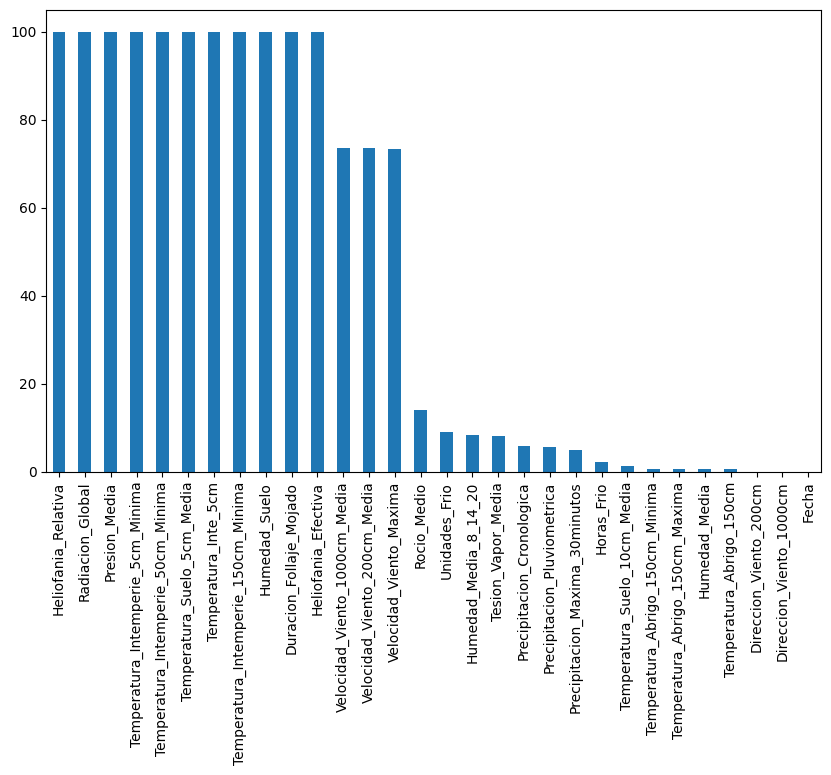

In [131]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [132]:
# identifico las columnas que tienen mas de 15% de nulos
serie2 = serie.loc[serie > 15]
col_del = serie2.index.tolist()
col_del

['Heliofania_Relativa',
 'Radiacion_Global',
 'Presion_Media',
 'Temperatura_Intemperie_5cm_Minima',
 'Temperatura_Intemperie_50cm_Minima',
 'Temperatura_Suelo_5cm_Media',
 'Temperatura_Inte_5cm',
 'Temperatura_Intemperie_150cm_Minima',
 'Humedad_Suelo',
 'Duracion_Follaje_Mojado',
 'Heliofania_Efectiva',
 'Velocidad_Viento_1000cm_Media',
 'Velocidad_Viento_200cm_Media',
 'Velocidad_Viento_Maxima']

In [133]:
# identifico las columnas que tienen hasta 15% de nulos. quito los que no tienen nullos

serie3 = serie.loc[(serie <= 15) & (serie > 0)]
col_inter = serie3.index.tolist()
col_inter

['Rocio_Medio',
 'Unidades_Frio',
 'Humedad_Media_8_14_20',
 'Tesion_Vapor_Media',
 'Precipitacion_Cronologica',
 'Precipitacion_Pluviometrica',
 'Precipitacion_Maxima_30minutos',
 'Horas_Frio',
 'Temperatura_Suelo_10cm_Media',
 'Temperatura_Abrigo_150cm_Minima',
 'Temperatura_Abrigo_150cm_Maxima',
 'Humedad_Media',
 'Temperatura_Abrigo_150cm']

# Borrado de columnas

In [149]:
# Borro columnas que tienen mas de 15% nullos . Genero nuevo df_1
df_1 = df.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
df_1.columns # Verificando las columnas que quedaron

Index(['Fecha', 'Temperatura_Abrigo_150cm', 'Temperatura_Abrigo_150cm_Maxima',
       'Temperatura_Abrigo_150cm_Minima', 'Temperatura_Suelo_10cm_Media',
       'Precipitacion_Pluviometrica', 'Precipitacion_Cronologica',
       'Precipitacion_Maxima_30minutos', 'Tesion_Vapor_Media', 'Humedad_Media',
       'Humedad_Media_8_14_20', 'Rocio_Medio', 'Direccion_Viento_200cm',
       'Direccion_Viento_1000cm', 'Horas_Frio', 'Unidades_Frio'],
      dtype='object')

In [150]:
print(df_1.shape)

(4351, 16)


In [136]:
df_1.head()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Suelo_10cm_Media,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,Tesion_Vapor_Media,Humedad_Media,Humedad_Media_8_14_20,Rocio_Medio,Direccion_Viento_200cm,Direccion_Viento_1000cm,Horas_Frio,Unidades_Frio
0,2010-11-11 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN
1,2010-11-12 00:00:00.0,14.10626,23.1,5.7,16.25625,0.0,0.0,0.0,13.56597,81.0,76.0,11.32151,,,2.822,-3.651998
2,2010-11-13 00:00:00.0,18.46319,26.7,12.0,18.33056,0.0,0.0,0.0,16.28234,77.0,68.0,14.21525,,,0.000,-11.703000
3,2010-11-14 00:00:00.0,16.00417,22.5,11.3,19.36319,0.0,0.0,0.0,15.49933,89.0,84.0,13.48437,,,0.000,-6.805998
4,2010-11-15 00:00:00.0,15.63611,22.1,12.3,19.44653,0.0,0.0,0.0,16.17165,91.0,92.0,14.13538,,,0.000,-8.216997


In [137]:
# verifico si hay registros duplicados
print('La cantidad de registros duplicados es:', df_1.duplicated().sum())

La cantidad de registros duplicados es: 0


# Tratamiento a valores nulos

In [138]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha                            4351 non-null   object 
 1   Temperatura_Abrigo_150cm         4323 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima  4319 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima  4319 non-null   float64
 4   Temperatura_Suelo_10cm_Media     4293 non-null   float64
 5   Precipitacion_Pluviometrica      4103 non-null   float64
 6   Precipitacion_Cronologica        4090 non-null   float64
 7   Precipitacion_Maxima_30minutos   4139 non-null   float64
 8   Tesion_Vapor_Media               3992 non-null   float64
 9   Humedad_Media                    4321 non-null   float64
 10  Humedad_Media_8_14_20            3982 non-null   float64
 11  Rocio_Medio                      3734 non-null   float64
 12  Direccion_Viento_200

<Axes: >

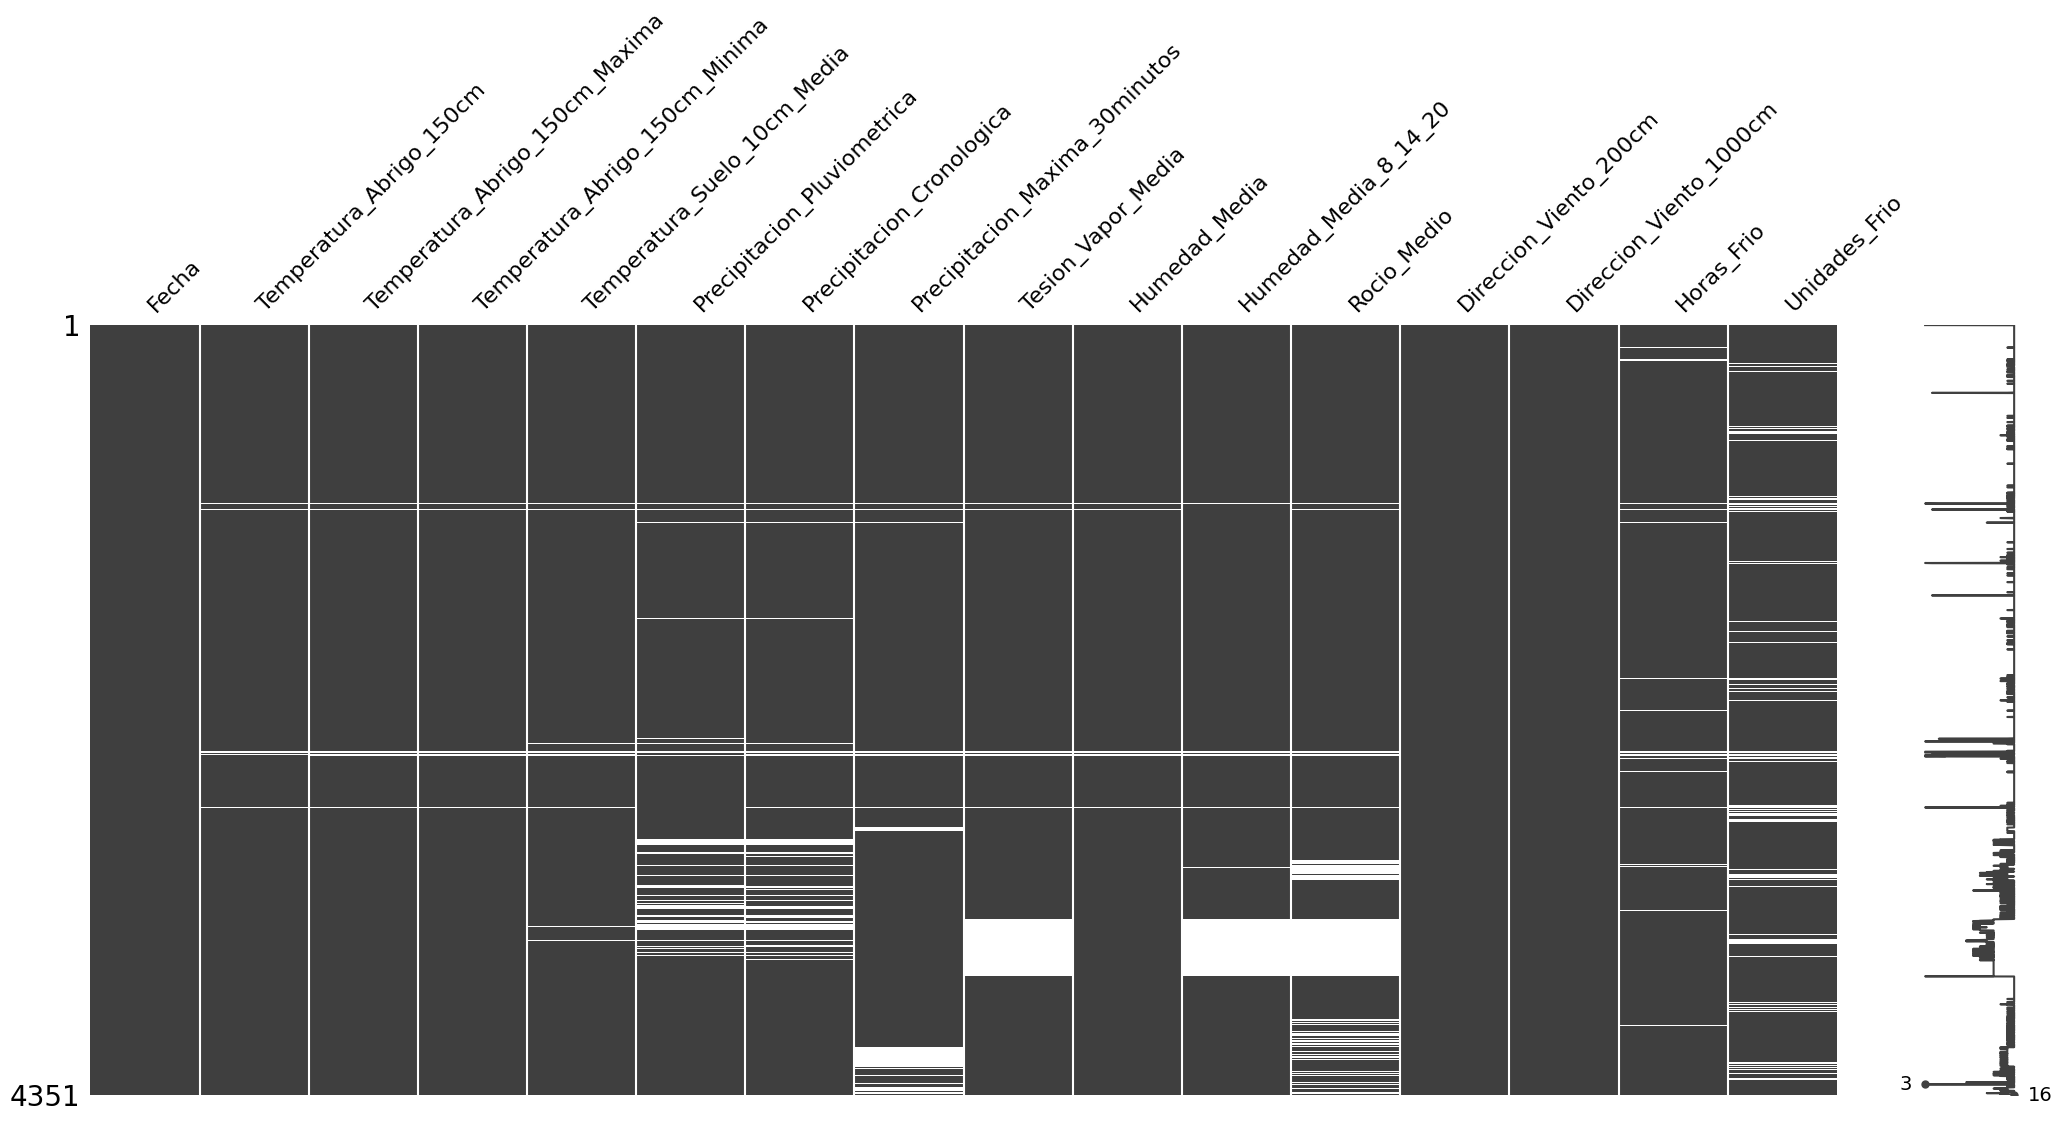

In [87]:
# reviso la implicancia de los valores
msno.matrix(df_1)

#identifico las variables: Tesion_Vapor_Media, Humedad_Media_8_14_20 y Rocio_Medio

<Axes: >

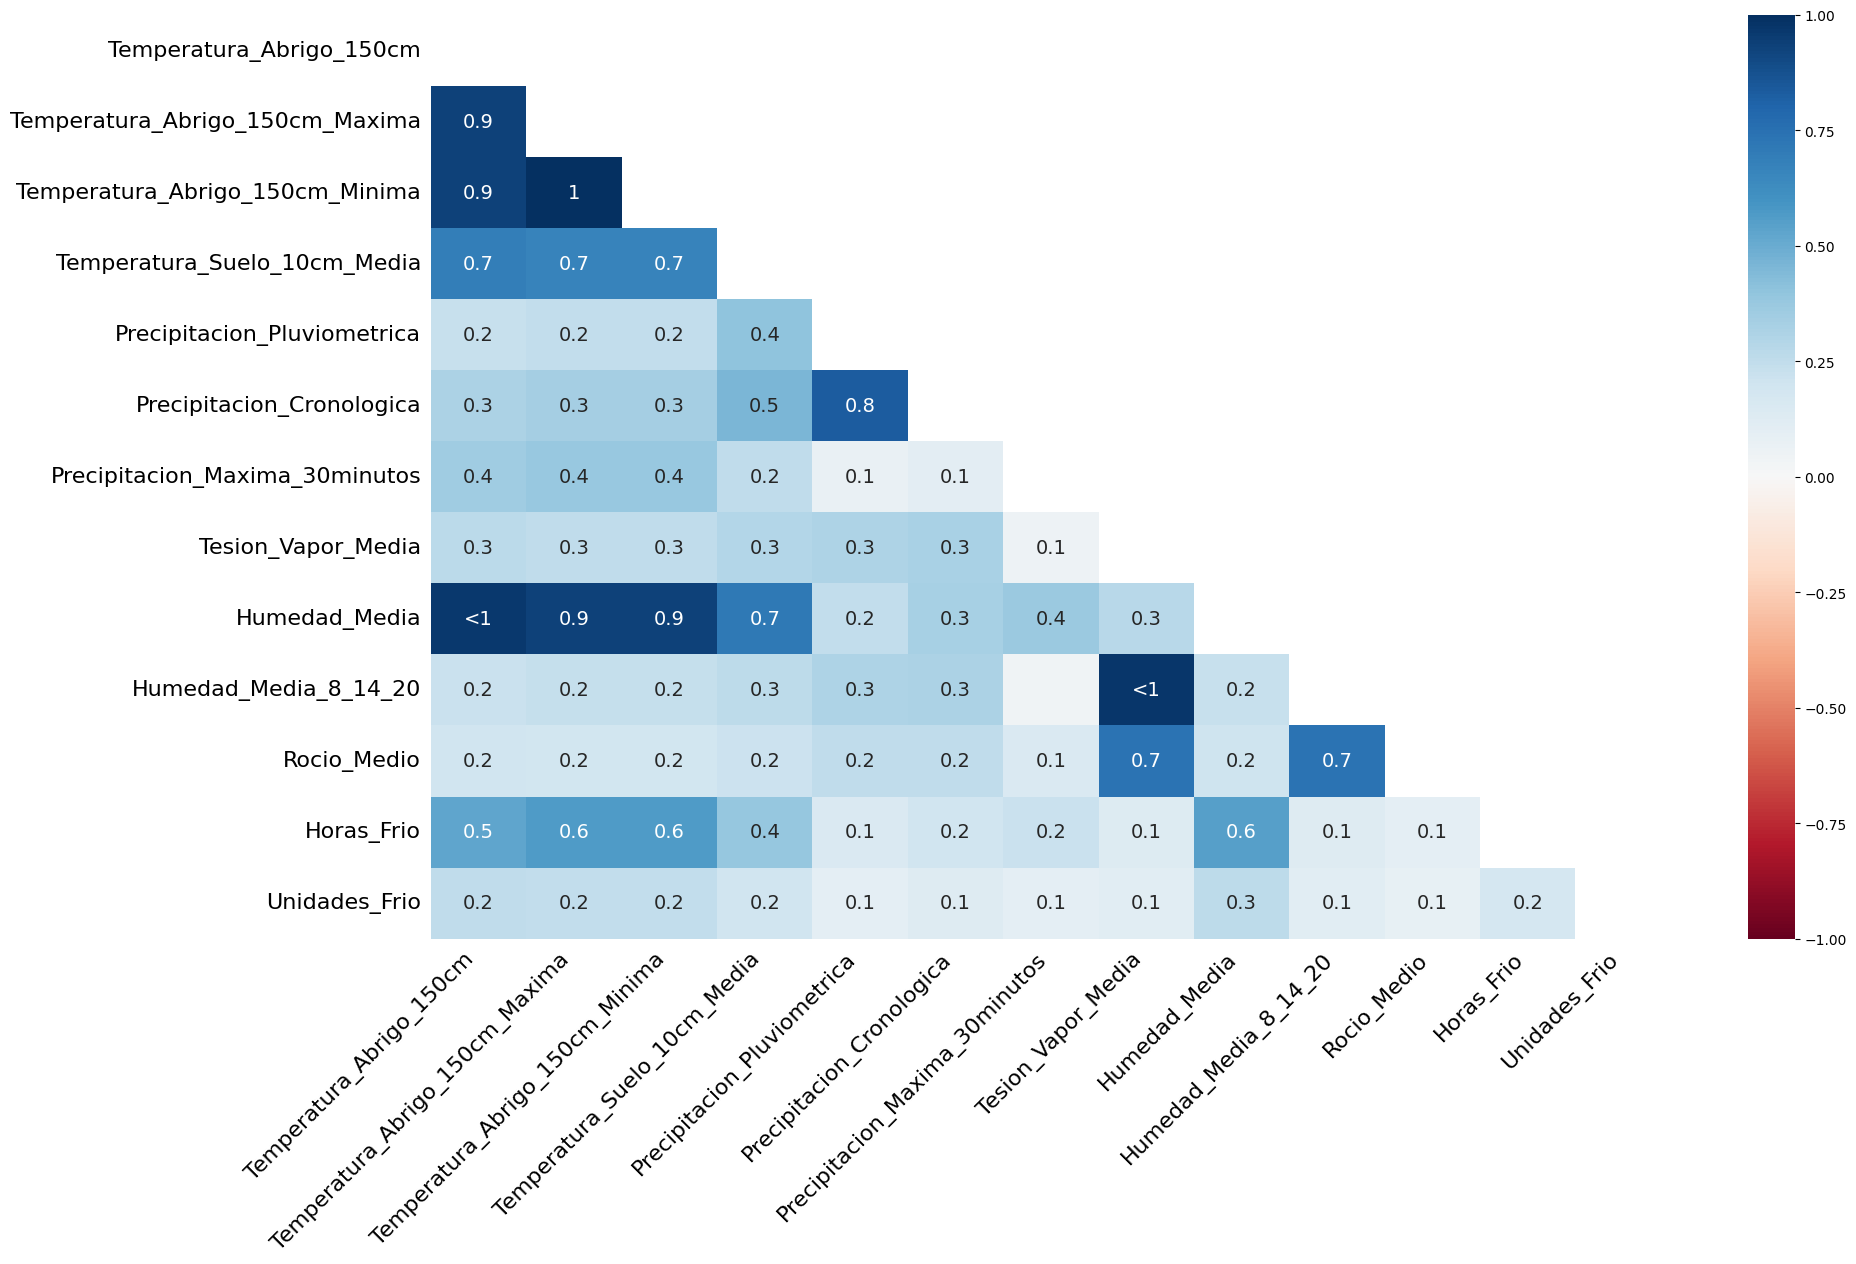

In [89]:
msno.heatmap(df_1)

<Axes: >

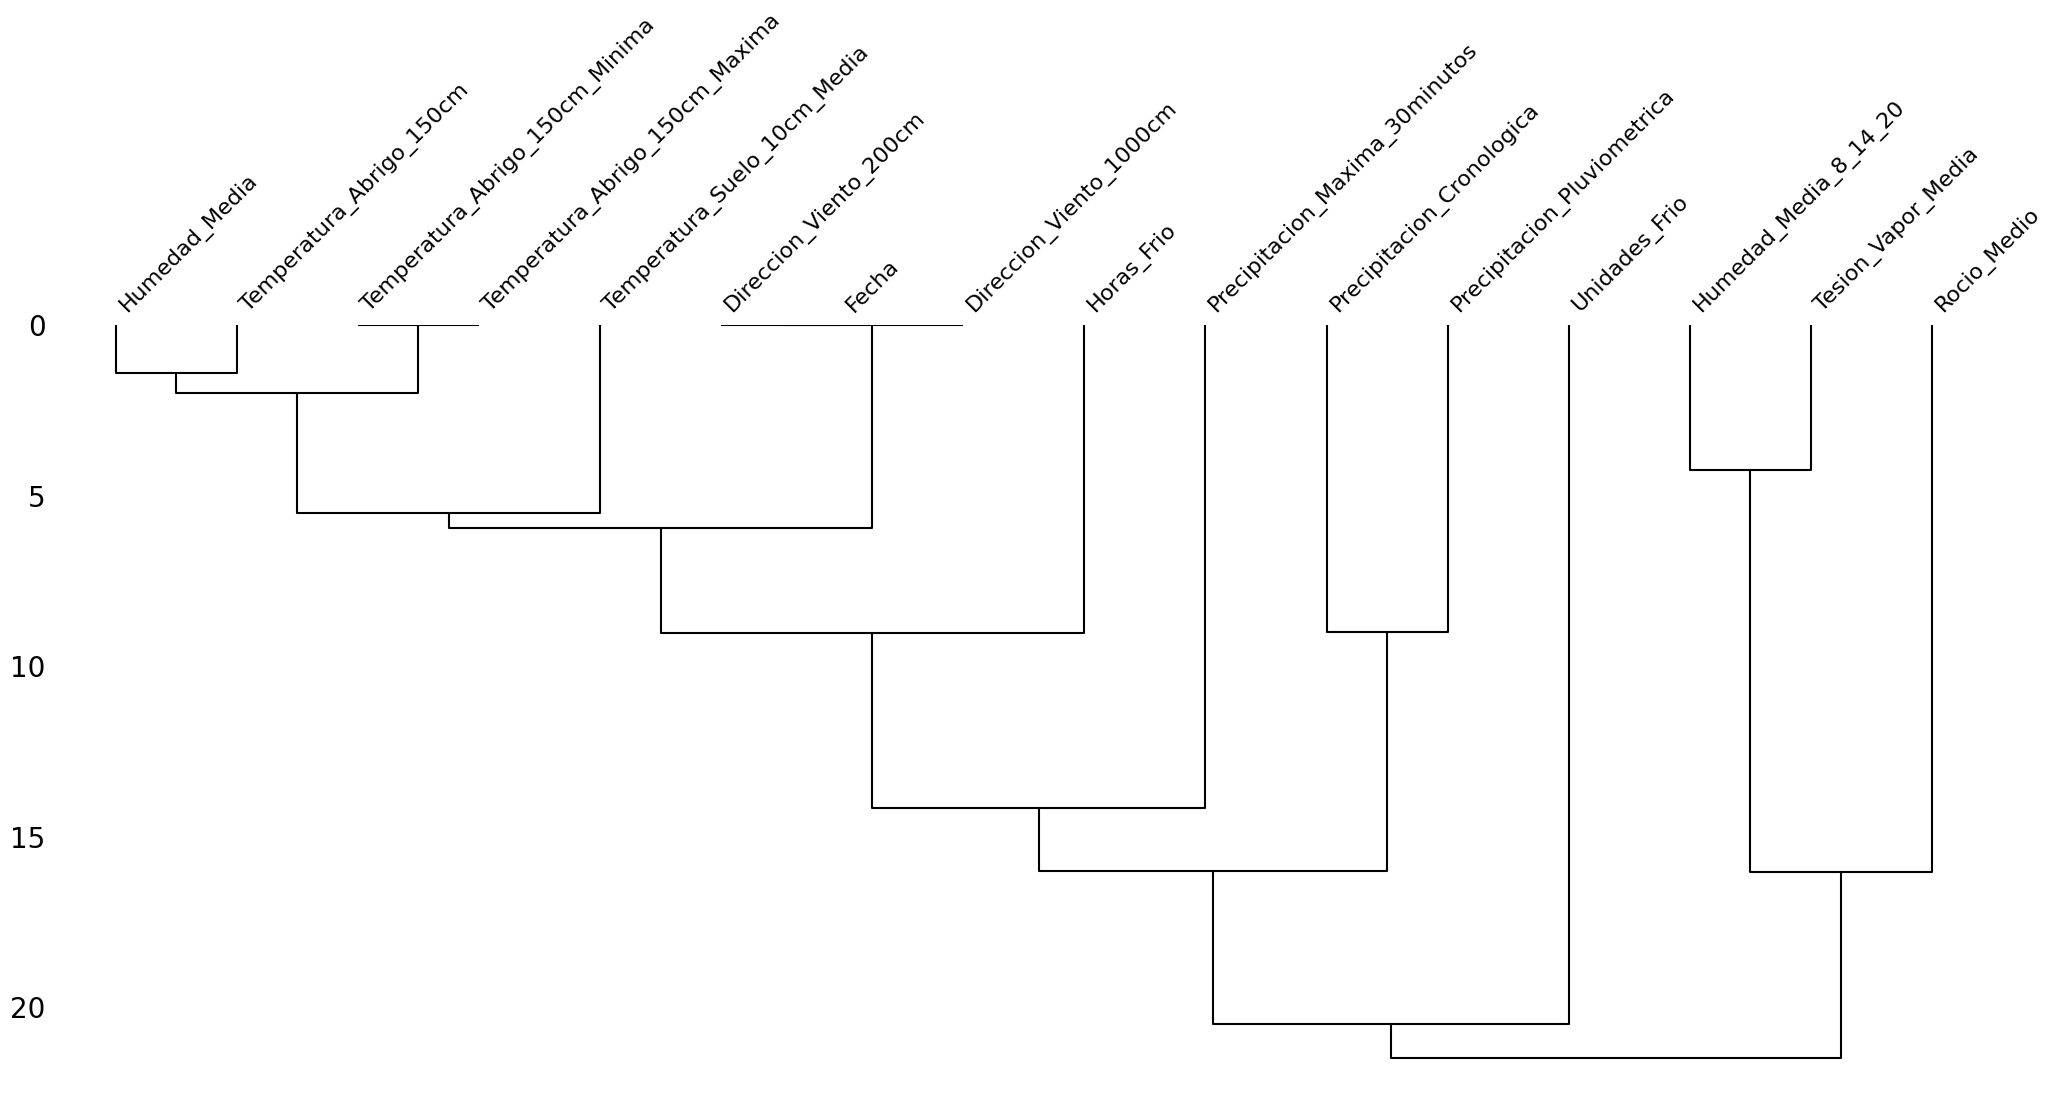

In [90]:
msno.dendrogram(df_1)

In [139]:
# Reviso de nuevo los porcentaje de nulos por columna
serie_1 = (df_1.isnull().sum() / df_1.shape[0])*100
serie_1 = serie_1.sort_values(ascending=False)
serie_1

Rocio_Medio                        14.180648
Unidades_Frio                       9.147322
Humedad_Media_8_14_20               8.480809
Tesion_Vapor_Media                  8.250977
Precipitacion_Cronologica           5.998621
Precipitacion_Pluviometrica         5.699839
Precipitacion_Maxima_30minutos      4.872443
Horas_Frio                          2.252356
Temperatura_Suelo_10cm_Media        1.333027
Temperatura_Abrigo_150cm_Maxima     0.735463
Temperatura_Abrigo_150cm_Minima     0.735463
Humedad_Media                       0.689497
Temperatura_Abrigo_150cm            0.643530
Fecha                               0.000000
Direccion_Viento_200cm              0.000000
Direccion_Viento_1000cm             0.000000
dtype: float64

# Decido revisar los valores estadisticos de las variables identificadas
### Rocio_Medio, Tesion_Vapor_Media y Humedad_Media_8_14_20

In [122]:

# Rocio_Medio
df_1.Rocio_Medio.isnull().sum() 

0

In [151]:
df_1.Rocio_Medio.isna().sum()

617

In [41]:
df_1.Rocio_Medio.describe()

count    3734.000000
mean       10.095812
std         5.496488
min       -15.211930
25%         6.418216
50%        10.102155
75%        14.012010
max        25.881550
Name: Rocio_Medio, dtype: float64

In [93]:
df_1.Rocio_Medio.median()


10.102155

In [94]:
df_1.Rocio_Medio.mode()

0    13.48437
1    14.52180
2    17.92884
3    18.02451
Name: Rocio_Medio, dtype: float64

In [96]:
# Tesion_Vapor_Media
df_1.Tesion_Vapor_Media.describe()

count    3992.000000
mean       12.997367
std         4.939020
min         0.001470
25%         9.475567
50%        12.353700
75%        16.006355
max        36.304520
Name: Tesion_Vapor_Media, dtype: float64

In [98]:
df_1.Tesion_Vapor_Media.median()

12.3537

In [99]:
#Humedad_Media_8_14_20
df_1.Humedad_Media_8_14_20.describe()

count    3982.000000
mean       73.935460
std        16.614596
min         3.000000
25%        64.000000
50%        76.000000
75%        86.000000
max       100.000000
Name: Humedad_Media_8_14_20, dtype: float64

In [100]:
#Humedad_Media_8_14_20
df_1.Humedad_Media_8_14_20.median()

76.0

In [42]:
# Unidades_Frio
df_1.Unidades_Frio.describe()

count    3953.000000
mean       -3.315027
std        12.223725
min       -23.904030
25%       -13.529010
50%        -3.237000
75%         7.303997
max        21.331020
Name: Unidades_Frio, dtype: float64

# Interpolacion

In [180]:
# guardo una copia del df_1 sin nulos, antes de hacer la interpolacion
df_2 = df_1.copy()

print(df_1.shape)
print(df_2.shape)


(4351, 16)
(4351, 16)


In [181]:
col_inter

array(['Horas_Frio', 'Humedad_Media', 'Precipitacion_Cronologica',
       'Precipitacion_Maxima_30minutos', 'Precipitacion_Pluviometrica',
       'Temperatura_Abrigo_150cm', 'Temperatura_Abrigo_150cm_Maxima',
       'Temperatura_Abrigo_150cm_Minima', 'Temperatura_Suelo_10cm_Media',
       'Unidades_Frio'], dtype='<U31')

In [182]:
# Columnas a interpolar con la mediana
col_median= ['Rocio_Medio','Humedad_Media_8_14_20','Tesion_Vapor_Media'] 
col_median

['Rocio_Medio', 'Humedad_Media_8_14_20', 'Tesion_Vapor_Media']

In [183]:
# Quito las col_median de las col_inter
col_inter = np.setdiff1d(col_inter, col_median)
print(col_inter)

['Horas_Frio' 'Humedad_Media' 'Precipitacion_Cronologica'
 'Precipitacion_Maxima_30minutos' 'Precipitacion_Pluviometrica'
 'Temperatura_Abrigo_150cm' 'Temperatura_Abrigo_150cm_Maxima'
 'Temperatura_Abrigo_150cm_Minima' 'Temperatura_Suelo_10cm_Media'
 'Unidades_Frio']


# Para pensar con que reemplazar:

*   La **media** aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.  media = df["nota"].mean()
*   La **mediana** es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante. mediana = df["nota"].median()

*   La **moda** es el valor más repetido (solo aplicable a variables discretas. moda = df["nota"].mode()











In [184]:
# reemplazar por la mediana en las columnas numericas en col_median 
for i in col_median: 
  df_2[i] = df_2[i].fillna(df_2[i].median())

In [185]:
df_2.Rocio_Medio.isnull().sum() # Verificar que funciono

0

In [186]:
df_1.Rocio_Medio.isnull().sum() # Verificar que en el df_1 quedo igual q antes :)

617

In [187]:
# reemplazar por la mediana en las columnas numericas en col_inter 
for i in col_inter: 
  df_2[i] = df_2[i].fillna(df_2[i].mean())

In [188]:
# Verifico que no me quedan mas nulos
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha                            4351 non-null   object 
 1   Temperatura_Abrigo_150cm         4351 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima  4351 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima  4351 non-null   float64
 4   Temperatura_Suelo_10cm_Media     4351 non-null   float64
 5   Precipitacion_Pluviometrica      4351 non-null   float64
 6   Precipitacion_Cronologica        4351 non-null   float64
 7   Precipitacion_Maxima_30minutos   4351 non-null   float64
 8   Tesion_Vapor_Media               4351 non-null   float64
 9   Humedad_Media                    4351 non-null   float64
 10  Humedad_Media_8_14_20            4351 non-null   float64
 11  Rocio_Medio                      4351 non-null   float64
 12  Direccion_Viento_200

# Verifico los tipos de datos de las variables

### Decido revisar los siguientes tipos de datos
### Fecha -- es Object y deberia ser Date
### Direccion_Viento_200cm  -- que valores tienen ?
### Direccion_Viento_1000cm   -- que valores tienen ?

In [189]:
# para fecha, la convierto a DateTime
df_2['Fecha'] =  pd.to_datetime(df_2['Fecha'])

In [197]:
# para las otras dos, las convierto a string
df_2['Direccion_Viento_200cm'] = df_2['Direccion_Viento_200cm'].astype('string')
df_2['Direccion_Viento_1000cm'] = df_2['Direccion_Viento_1000cm'].astype('string')

In [198]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            4351 non-null   datetime64[ns]
 1   Temperatura_Abrigo_150cm         4351 non-null   float64       
 2   Temperatura_Abrigo_150cm_Maxima  4351 non-null   float64       
 3   Temperatura_Abrigo_150cm_Minima  4351 non-null   float64       
 4   Temperatura_Suelo_10cm_Media     4351 non-null   float64       
 5   Precipitacion_Pluviometrica      4351 non-null   float64       
 6   Precipitacion_Cronologica        4351 non-null   float64       
 7   Precipitacion_Maxima_30minutos   4351 non-null   float64       
 8   Tesion_Vapor_Media               4351 non-null   float64       
 9   Humedad_Media                    4351 non-null   float64       
 10  Humedad_Media_8_14_20            4351 non-null   float64    

In [199]:
# Para Direccion_Viento_200cm y Direccion_Viento_1000cm necesito alguna tecnica de reemplazo
df_2.Direccion_Viento_200cm.value_counts()

C     2966
       537
W      245
N      152
NE     136
S      122
NW     112
E       74
SE       7
Name: Direccion_Viento_200cm, dtype: Int64

In [178]:
df_2.Direccion_Viento_1000cm.value_counts()

C    3814
      537
Name: Direccion_Viento_1000cm, dtype: int64

In [61]:
df_2.Direccion_Viento_1000cm.isnull().sum()

0

In [62]:
df_2.Direccion_Viento_1000cm.isna().sum()

0

In [200]:

#copio a una nueva version de df
df_3 = df_2.copy()



In [201]:
# Hay 537 valores que no figuran como nulos, ni tampoco entre el conteo de los valores

df_3['len1'] = df_3['Direccion_Viento_1000cm'].str.len()
df_3.head()

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Suelo_10cm_Media,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,Tesion_Vapor_Media,Humedad_Media,Humedad_Media_8_14_20,Rocio_Medio,Direccion_Viento_200cm,Direccion_Viento_1000cm,Horas_Frio,Unidades_Frio,len1
0,2010-11-11,14.520663,21.882751,8.139338,15.350198,1.785876,1.775844,0.699493,12.35370,70.038648,76.0,10.102155,,,3.557935,-3.315027,2
1,2010-11-12,14.106260,23.100000,5.700000,16.256250,0.000000,0.000000,0.000000,13.56597,81.000000,76.0,11.321510,,,2.822000,-3.651998,2
2,2010-11-13,18.463190,26.700000,12.000000,18.330560,0.000000,0.000000,0.000000,16.28234,77.000000,68.0,14.215250,,,0.000000,-11.703000,2
3,2010-11-14,16.004170,22.500000,11.300000,19.363190,0.000000,0.000000,0.000000,15.49933,89.000000,84.0,13.484370,,,0.000000,-6.805998,2
4,2010-11-15,15.636110,22.100000,12.300000,19.446530,0.000000,0.000000,0.000000,16.17165,91.000000,92.0,14.135380,,,0.000000,-8.216997,2


In [202]:
df_3['Direccion_Viento_1000cm'] = df_3['Direccion_Viento_1000cm'].str.strip()
df_3['len1'] = df_3['Direccion_Viento_1000cm'].str.len()
df_3.head()


,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Suelo_10cm_Media,Precipitacion_Pluviometrica,Precipitacion_Cronologica,Precipitacion_Maxima_30minutos,Tesion_Vapor_Media,Humedad_Media,Humedad_Media_8_14_20,Rocio_Medio,Direccion_Viento_200cm,Direccion_Viento_1000cm,Horas_Frio,Unidades_Frio,len1
0,2010-11-11,14.520663,21.882751,8.139338,15.350198,1.785876,1.775844,0.699493,12.35370,70.038648,76.0,10.102155,,,3.557935,-3.315027,0
1,2010-11-12,14.106260,23.100000,5.700000,16.256250,0.000000,0.000000,0.000000,13.56597,81.000000,76.0,11.321510,,,2.822000,-3.651998,0
2,2010-11-13,18.463190,26.700000,12.000000,18.330560,0.000000,0.000000,0.000000,16.28234,77.000000,68.0,14.215250,,,0.000000,-11.703000,0
3,2010-11-14,16.004170,22.500000,11.300000,19.363190,0.000000,0.000000,0.000000,15.49933,89.000000,84.0,13.484370,,,0.000000,-6.805998,0
4,2010-11-15,15.636110,22.100000,12.300000,19.446530,0.000000,0.000000,0.000000,16.17165,91.000000,92.0,14.135380,,,0.000000,-8.216997,0


In [203]:
# veo que esos 537 siguen ahi!
df_3.Direccion_Viento_200cm.value_counts()

C     2966
       537
W      245
N      152
NE     136
S      122
NW     112
E       74
SE       7
Name: Direccion_Viento_200cm, dtype: Int64

In [171]:
df_2['Direccion_Viento_200cm'] = df_2['Direccion_Viento_200cm'].str.strip()
df_2['Direccion_Viento_1000cm'] = df_2['Direccion_Viento_1000cm'].str.strip()


In [173]:
df_2.Direccion_Viento_200cm.value_counts()

C     2966
       537
W      245
N      152
NE     136
S      122
NW     112
E       74
SE       7
Name: Direccion_Viento_200cm, dtype: int64

In [174]:
df_3.Direccion_Viento_200cm.value_counts()

C     2966
       537
W      245
N      152
NE     136
S      122
NW     112
E       74
SE       7
Name: Direccion_Viento_200cm, dtype: int64